# Histograms_Numpy
using NUMPY to generate a histogram from a column of data

## import Python data packages

In [6]:
import numpy as np # Numerical Python 
import matplotlib.pyplot as plt #Plotting package 
import pint # units package
unit = pint.UnitRegistry()

## import data 
This data file is in csv (comma separated variable) format. 
1. The first column indicates the run number. It increases by 1 each run and indicates the total number of muons that have arrived since the experiment started. 
2. The second column is the elapsed time in $\mu$s between the arrival of the muon (that starts the stopwatch) and the next muon (which stops the stopwatch, resets it, and starts the stopwatch again for the next run.
3. We will skip the first 8 rows of the file --- the file header --- to get to the first row of data 

The command used to import the data is [numpy.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) (shortened to 'np.loadtext' )

```numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding=None, max_rows=None, *, quotechar=None, like=None)```

### load data from csv text file
[data repository](https://github.com/SmithCollegePhysics/PHY350manual/tree/main/code/data)


In [8]:
file_name = 'timerdata.log' # supply your own file name 
file_folder = 'data/'              
data_file = file_folder + file_name

time_interval_data = np.loadtxt(data_file, delimiter = ",", skiprows = 8, usecols = (1), unpack = True)

### add units to data 

In [19]:
# the original data is in microseconds
time_interval = time_interval_data * unit.microseconds

# we can convert the data to units of seconds 
time_interval_in_sec = time_interval.to(unit.s)

# inspect array, print value of first element in array

value = time_interval_in_sec[0]  # select first element in array 
print(f"{value:.3g}")            # print value of first data element using 3 sig figs

0.387 second


## generate histogram "by hand" 

use [np.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram) function

```numpy.histogram(a, bins=10, range=None, density=None, weights=None)```

In [40]:
bin_number = 50 # specify number or allow 
bin_range = np.array([0, 5]) * unit.s

frequency, bin_edges = np.histogram(time_interval_in_sec.magnitude, bins = bin_number, range = bin_range.magnitude)

bin_start_values = bin_edges[:-1]
bin_end_values = bin_edges[1:]
bin_center_values = (bin_start_values + bin_end_values) / 2
bin_width_values = bin_end_values - bin_start_values
bin_width= np.mean(bin_width_values)

In [38]:
print(bin_center_values[0:5])
print(bin_center_values[-5:])
print(bin_width_values[0:5])

[0.05 0.15 0.25 0.35 0.45]
[4.55 4.65 4.75 4.85 4.95]
[0.1 0.1 0.1 0.1 0.1]


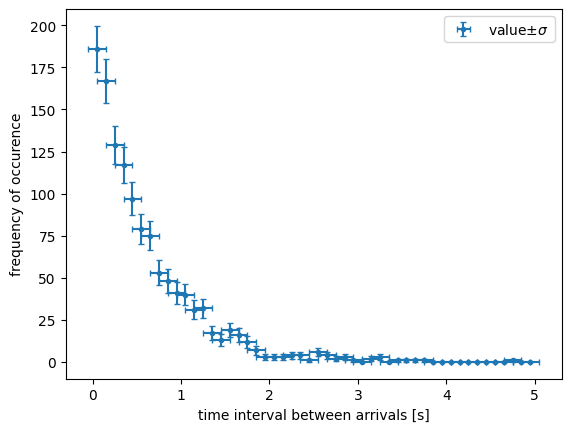

In [76]:
plt.figure()
plt.errorbar(bin_center_values, frequency, 
             xerr = bin_width, yerr = np.sqrt(frequency), 
             marker = ".", linestyle = "none" , capsize = 2, 
             label = r"value$\pm\sigma$" )
plt.xlabel("time interval between arrivals [s]")
plt.ylabel("frequency of occurence")
plt.legend() 
plt.show()

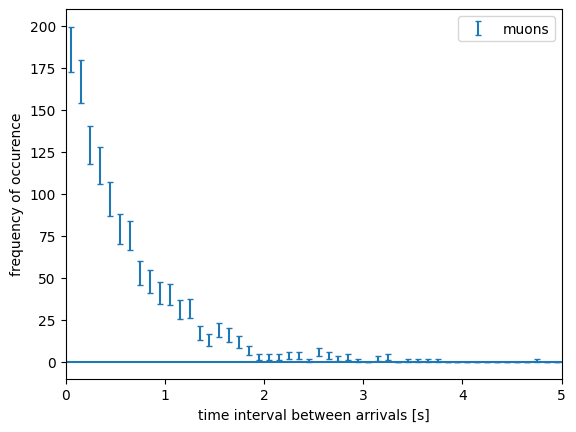

In [71]:
# replot without center points and error bar width
plt.figure()
plt.errorbar(bin_center_values, frequency,  yerr = np.sqrt(frequency),  
             linestyle = "none" , capsize = 2, label = "muons" )
plt.xlabel("time interval between arrivals [s]")
plt.ylabel("frequency of occurence")
plt.xlim(0,5)
plt.ylim(-10,210)
plt.axhline()
plt.legend() 
plt.show()

## generate histogram automatically
This makes histograms without first generating the arrays used to plot the data. Great for plots, not so great if you want to curve fit to the data. 

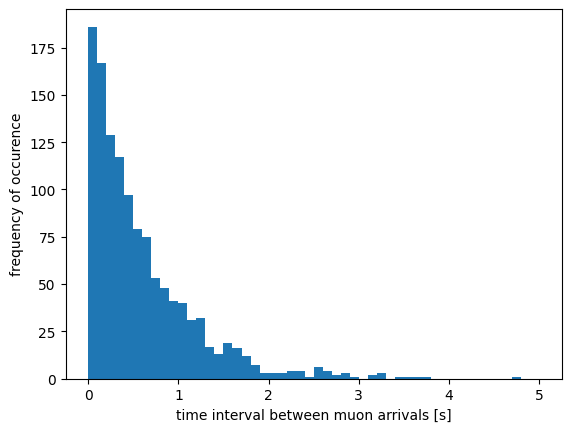

In [77]:
plt.figure()
plt.hist(time_interval_in_sec.magnitude, bins = 50, range = (0, 5))
plt.xlabel("time interval between muon arrivals [s]")
plt.ylabel("frequency of occurence")
plt.show()